In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from kmodes.kmodes import KModes
from sklearn.metrics import silhouette_score

In [2]:
import os 
os.chdir(r'C:\Users\Vish\Documents\Data\Dataset')
df=pd.read_csv('Loan.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df=df.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History'],axis=1)

In [5]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [6]:
df=df.dropna(how='any')

In [7]:
df_copy=df.copy(deep=True)

In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df= df.apply(le.fit_transform)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 42, cost: 1062.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 29, cost: 971.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 32, cost: 914.0


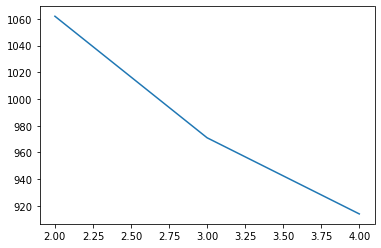

In [9]:
cost = []
for num_clusters in list(range(2,5)):
    kmode = KModes(n_clusters=num_clusters)
    kmode.fit_predict(df_copy)
    cost.append(kmode.cost_)
plt.plot(range(2,5),cost)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 42, cost: 1062.0
For no of clusters = 2  The average silhouette_score is : 0.11673777522784182
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 29, cost: 971.0
For no of clusters = 3  The average silhouette_score is : 0.09204975926753017
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 32, cost: 914.0
For no of clusters = 4  The average silhouette_score is : 0.03511236584497802


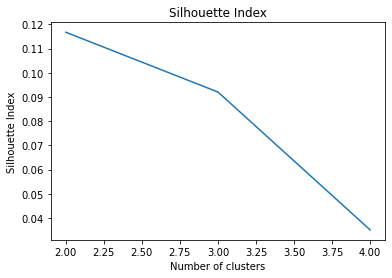

In [11]:
silhouette_index=[]
for num_clusters in range(2,5): 
    kmode = KModes(n_clusters = num_clusters) 
    cluster_labels = kmode.fit_predict(df) 
    silhouette_avg = silhouette_score(df, cluster_labels) 
    silhouette_index.append(silhouette_avg)
    print("For no of clusters =", num_clusters, " The average silhouette_score is :", silhouette_avg) 

plt.plot(range(2,5),silhouette_index)
plt.title('Silhouette Index')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Index')
plt.show()

In [13]:
km_cao = KModes(n_clusters=2)
#n_clusters:int--The number of clusters to form
#init:{'Huang','Cao'}
#n_init:int
clusters_cao = km_cao.fit_predict(df)
clustersdf = pd.DataFrame(clusters_cao)
clustersdf.columns = ['cluster']
combineddf = pd.concat([df_copy, clustersdf], axis = 1).reset_index()
combineddf=combineddf.drop(['index'], axis = 1)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 42, cost: 1062.0
